In [1]:
%config InteractiveShell.ast_node_interactivity='all'
import phosphorus.dsl.backtick
from phosphorus.core.phivalue import PhiValue


             _    _                  _    _
            | |  | |                | |  | |
           _| |_ | |__   ___  ___  _| |_ | |__   ___  _ __ _   _  ____
          /     \| '_ \ / _ \/ __|/     \| '_ \ / _ \| '__| | | |/ ___)
         ( (| |) ) | | | (_) \__ ( (| |) ) | | | (_) | |  | |_| ( (__
          \_   _/|_| |_|\___/|___/\_   _/|_| |_|\___/|_|   \__,_|\__ \
            | |                     | |                            _) )
            |_|                     |_|                           (__/

        Welcome to the Phosphorus Meaning Engine v3
        Created by Ezra Keshet (EzraKeshet.com)




In [2]:
`lambda x=e: (RUN(x) and PLAY(x)).t
`BARKS(F) % False
guard = False
`BARKS(F) % guard

lambda x: RUN(x) and PLAY(x)

UNDEF

UNDEF

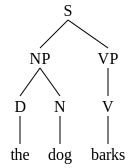

Matched S


In [9]:
from phosphorus.syntax.tree import Tree
t1 = Tree.fromstring('(S (NP (D the) (N dog)) (VP (V barks)))')
t1

match(t1):
  case Tree('S'):
    print("Matched S")

In [4]:
get_ipython().input_transformers_post
get_ipython().ast_transformers

[<function phosphorus.dsl.backtick.install_backtick_dsl.<locals>.token_replacer(code)>]

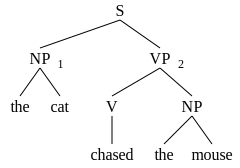

In [5]:
from phosphorus.syntax.tree import Tree

t1 = Tree.fromstring(
"""
(S
  (NP_1 the cat)
  (VP_2 (V chased)
    (NP the mouse)
  )
)
""")

t1

In [6]:
# Jupyter test suite using only PhiValue’s public API

from IPython.display import display, Markdown
import ast

from phosphorus.core.phivalue import PhiValue
from phosphorus.core.stypes   import Type

# ----------------------------------------------------------------------------
# 1) Simplification tests via repr(PhiValue)
# ----------------------------------------------------------------------------
simplify_cases = [
  ("(lambda x: x+1)(2)",             "2+1"),
  ("(lambda x: (lambda y: x+y)(3))(4)","4+3"),
  ("(lambda f: f(10))(lambda y: y*2)","(lambda y: (y * 2))(10)"),
]

for src, expected in simplify_cases:
  pv     = PhiValue(ast.parse(src, mode="eval").body)
  display(Markdown(f"**Simplify** `{src}` → "))
  display(pv)
  #assert result == expected

display(Markdown("✅ **Simplification tests passed**"))

# ----------------------------------------------------------------------------
# 2) Type-inference tests via PhiValue.stype
# ----------------------------------------------------------------------------
type_cases = [
  ("(lambda x=Type.e: FLUFFY(x).t)(A)", Type.t),
  ("(lambda x=eet: x)(Y)",              Type.eet),
  ("x[e:x<5]",                          Type.e),
]

for src, expected in type_cases:
  pv    = PhiValue(ast.parse(src, mode="eval").body)
  stype = pv.stype
  display(Markdown(f"**Type of** `{src}` → `{stype}`"))
  display(pv)
  assert stype is expected

display(Markdown("✅ **Type inference tests passed**"))

# ----------------------------------------------------------------------------
# 3) Display test for a multi-line expression
# ----------------------------------------------------------------------------
long_expr = (
  "(mmmmmmmmmmmmmmmmmmmmmmmmmmmm for mmmmmmmmmmmmmmmmmmmmmmmmmmmm in                                    "
  "  (nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn for nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn in                                   "
  "    [ (lambda i: i*mmmmmmmmmmmmmmmmmmmmmmmmmmmm + nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn)(i)                  "
  "      for i in range(10)                      "
  "      if i % 2 == 0                           "
  "    ]                                         "
  "  )                                        "
  ")"
)
pv_long = PhiValue(ast.parse(long_expr, mode="eval").body, stype=Type.et_et_t)

display(Markdown("**Rich display for a long nested expression:**"))
display(pv_long)

html = pv_long._repr_html_()
assert "<pre" in html and "</pre>" in html
assert "pv-wrapper" in html

display(Markdown("✅ **Display tests passed**"))


**Simplify** `(lambda x: x+1)(2)` → 

2 + 1

**Simplify** `(lambda x: (lambda y: x+y)(3))(4)` → 

4 + 3

**Simplify** `(lambda f: f(10))(lambda y: y*2)` → 

10 * 2

✅ **Simplification tests passed**

**Type of** `(lambda x=Type.e: FLUFFY(x).t)(A)` → `t`

FLUFFY(A)

**Type of** `(lambda x=eet: x)(Y)` → `(e→(e→t))`

Y

**Type of** `x[e:x<5]` → `e`

x

✅ **Type inference tests passed**

**Rich display for a long nested expression:**

(mmmmmmmmmmmmmmmmmmmmmmmmmmmm for mmmmmmmmmmmmmmmmmmmmmmmmmmmm in (nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn for nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn in [0 * mmmmmmmmmmmmmmmmmmmmmmmmmmmm + nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn for i in range(10) if 0 % 2 == 0]))

✅ **Display tests passed**

In [7]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
from phosphorus.simplify import run_pass_tests
run_pass_tests()


             _    _                  _    _
            | |  | |                | |  | |
           _| |_ | |__   ___  ___  _| |_ | |__   ___  _ __ _   _  ____
          /     \| '_ \ / _ \/ __|/     \| '_ \ / _ \| '__| | | |/ ___)
         ( (| |) ) | | | (_) \__ ( (| |) ) | | | (_) | |  | |_| ( (__
          \_   _/|_| |_|\___/|___/\_   _/|_| |_|\___/|_|   \__,_|\__ \
            | |                     | |                            _) )
            |_|                     |_|                           (__/

        Welcome to the Phosphorus Meaning Engine v3
        Created by Ezra Keshet (EzraKeshet.com)


== Pipeline tests for NameInliner ==
'x' -> '1'    [OK]
'(1,2,3)[0]' -> '(1, 2, 3)[0]'    [OK]

== Pipeline tests for BetaReducer ==
'(lambda x: x + 1)(3)' -> '3 + 1'    [OK]
'((lambda x: (lambda y: x + y))(1))(2)' -> '1 + 2'    [OK]
'(lambda x, y: x * y)(2, 5)' -> '2 * 5'    [OK]
'(lambda y: (lambda x: x + y))(x)' -> 'lambda x_1: x_1 + x'    [OK]
'(lambda x: (lambda x: x + y))

In [ ]:
import ast
print(ast.dump(ast.parse('x+1')))

Module(body=[Expr(value=BinOp(left=Name(id='x', ctx=Load()), op=Add(), right=Constant(value=1)))], type_ignores=[])


In [ ]:
from phosphorus import *
%config InteractiveShell.ast_node_interactivity='all'

In [ ]:
class Meaning(Meaning):
  def rules(self, alpha, g):
    value, rule = None, None
    m = self
    match alpha:
      # TP
      case str() if '_' in alpha and alpha.split('_')[1].isdecimal():
        i = int(alpha.split('_')[1])
        rule = 'TP'
        value = 'g[i]'.e

      # TN
      case str() as s:
        rule = 'TN'
        value = self.lookup(s)
        if value is None:
          value = VACUOUS

      # PA
      case (i, beta) if str(i).isdecimal():
        i = int(i)
        rule = 'PA'
        value = (lambda x : m.i(beta, g | {i:x})).et

      # NN -- for Non-branching, vacuous nodes
      case (beta,) if m.i(beta,g) is VACUOUS:
        rule = 'NN'
        value = VACUOUS
        logger.warning('Ignoring vacuous item %s', beta)

      # Regular NN
      case (beta,):
        rule = 'NN'
        value = PV(m.i(beta,g))

      # NN with a vacuous right child
      case (beta, gamma) if  m.i(gamma,g) is VACUOUS:
        rule = 'NN'
        value = PV(m.i(beta,g))
        logger.warning('Ignoring vacuous item %s', gamma)

      # NN with a vacuous left child
      case (gamma, beta) if m.i(gamma,g) is VACUOUS:
        rule = 'NN'
        value = PV(m.i(beta,g))
        logger.warning('Ignoring vacuous item %s', gamma)

      # PM
      case (beta, gamma) if m.i(gamma,g) in Type.et and m.i(beta,g) in Type.et:
        rule = 'PM'
        value = (lambda x: m.i(beta,g)(x) and m.i(gamma,g)(x)).et

      # FA -- `takes` checks the type and checks for None output values
      case (beta, gamma) if takes(m.i(beta,g), m.i(gamma,g)):
        rule = 'FA'
        value = PV(m.i(beta,g)(m.i(gamma,g)))
      case (gamma, beta) if takes(m.i(beta,g), m.i(gamma,g)):
        rule = 'AF'
        value = PV(m.i(beta,g)(m.i(gamma,g)))

    return value, rule

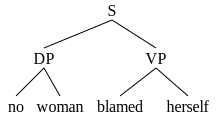

Interpreting S with parameters: [{}]
   Interpreting VP with parameters: [{}]
      Interpreting herself with parameters: [{}]
      => herself = lambda f: lambda x: f(x)(x)  type: (('e', ('e', 't')), ('e', 't'))	(TN)
      Interpreting blamed with parameters: [{}]
      => blamed = lambda y: lambda x: BLAMED(x, y)  type: ('e', ('e', 't'))	(TN)
   => VP = lambda x: BLAMED(x, x)  type: ('e', 't')	(AF)
   Interpreting DP with parameters: [{}]
      Interpreting woman with parameters: [{}]
      => woman = lambda x: WOMAN(x)  type: ('e', 't')	(TN)
      Interpreting no with parameters: [{}]
      => no = lambda p: lambda q: NO(xt(p), xt(q))  type: (('e', 't'), (('e', 't'), 't'))	(TN)
   => DP = lambda q: NO(xt(lambda x: WOMAN(x)), xt(q))  type: (('e', 't'), 't')	(FA)
=> S = NO(xt(lambda x: WOMAN(x)), xt(lambda x: BLAMED(x, x)))  type: 't'	(FA)


NO(xt(lambda x: WOMAN(x)), xt(lambda x: BLAMED(x, x)))

In [ ]:
from nltk import Tree
m5 = Meaning({
    'book'    : (lambda x: BOOK(x)).et,
    'woman'   : (lambda x: WOMAN(x)).et,
    'blamed'  : (lambda y: lambda x: BLAMED(x,y)).eet,
    'bought'  : (lambda y: lambda x: BOUGHT(x,y)).eet,
    'about'   : (lambda y: lambda x: ABOUT(x,y)).eet,
    'no'      : (lambda p: lambda q: NO(xt(p),xt(q))).et_et_t,
    'a'       : (lambda p: lambda q: 
                  lambda z: SOME(xt(p),xt(lambda y: q(y)(z)))).et_eet__et,
    'herself' : (lambda f: lambda x: f(x)(x)).eet__et
})

t1 = Tree.fromstring('(S (DP no woman) (VP blamed herself))')
t1
m5.i(t1, {})


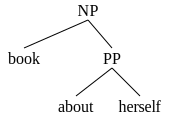

Interpreting NP with parameters: [{}]
   Interpreting PP with parameters: [{}]
      Interpreting herself with parameters: [{}]
      => herself = lambda f: lambda x: f(x)(x)  type: (('e', ('e', 't')), ('e', 't'))	(TN)
      Interpreting about with parameters: [{}]
      => about = lambda y: lambda x: ABOUT(x, y)  type: ('e', ('e', 't'))	(TN)
   => PP = lambda x: ABOUT(x, x)  type: ('e', 't')	(AF)
   Interpreting book with parameters: [{}]
   => book = lambda x: BOOK(x)  type: ('e', 't')	(TN)
=> NP = lambda x: BOOK(x) and ABOUT(x, x)  type: ('e', 't')	(PM)


lambda x: BOOK(x) and ABOUT(x, x)

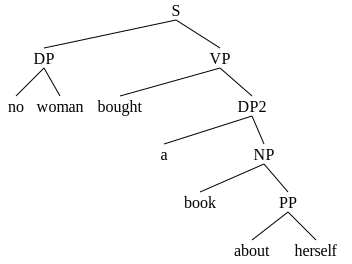

Interpreting S with parameters: [{}]
   Interpreting VP with parameters: [{}]
      Interpreting DP2 with parameters: [{}]
         Interpreting NP with parameters: [{}]
            Interpreting PP with parameters: [{}]
               Interpreting herself with parameters: [{}]
               => herself = lambda f: lambda x: f(x)(x)  type: (('e', ('e', 't')), ('e', 't'))	(TN)
               Interpreting about with parameters: [{}]
               => about = lambda y: lambda x: ABOUT(x, y)  type: ('e', ('e', 't'))	(TN)
            => PP = lambda x: ABOUT(x, x)  type: ('e', 't')	(AF)
            Interpreting book with parameters: [{}]
            => book = lambda x: BOOK(x)  type: ('e', 't')	(TN)
         => NP = lambda x: BOOK(x) and ABOUT(x, x)  type: ('e', 't')	(PM)
         Interpreting a with parameters: [{}]
         => a = lambda p: lambda q: lambda z: SOME(xt(p), xt(lambda y: q(y)(z)))  type: (('e', 't'), (('e', ('e', 't')), ('e', 't')))	(TN)
      => DP2 = lambda q: lambda z: SOME

NO(xt(lambda x: WOMAN(x)), xt(lambda z: SOME(xt(lambda x: BOOK(x) and ABOUT(x, x)), xt(lambda y: BOUGHT(z, y)))))

In [ ]:
t2 = Tree.fromstring('(NP book (PP about herself))')
t2
console_handler.setLevel(logging.INFO)
m5.i(t2, {})
console_handler.setLevel(logging.INFO)

t3 = Tree.fromstring(f'(S (DP no woman) (VP bought (DP2 a {t2})))')
t3
m5.i(t3, {})

In [ ]:
"EVERY(xt(lambda x: BASKET(x)), xt(lambda x: ONE(xt(lambda y: APPLE(y) and IN(y, x)), xt(lambda x: ROTTEN(x)))))".t

EVERY(xt(lambda x: BASKET(x)), xt(lambda x: ONE(xt(lambda y: APPLE(y) and IN(y, x)), xt(lambda x: ROTTEN(x)))))

In [ ]:
NP = (lambda y: APPLE(y) and IN(y, x)).et
from copy import deepcopy
NP2 = deepcopy(NP)
type(NP2)
NP2.type
NP2.closure

phosphorus.semval.Lambda

('e', 't')

<function __main__.<lambda>(y)>

In [ ]:
xt = charset
NP = (lambda y: APPLE(y) and IN(y, x)).et
one = (lambda p: lambda q: ONE(xt(p), xt(q))).et_et_t
#console_handler.setLevel(logging.DEBUG)
PV(one(NP))
console_handler.setLevel(logging.INFO)

lambda q: ONE(xt(lambda y: APPLE(y) and IN(y, x)), xt(q))

In [ ]:
ff = 'BOOK'.et 
gg = (lambda y: WROTE(x, y)).et

(lambda x: ff(x) and gg(x)).et

lambda y: BOOK(y) and WROTE(x, y)

In [ ]:
from phosphorus.lambda_calc import toast
toast(toast(1, code_string=False))

In [ ]:
from phosphorus.lambda_calc import Simplifier
gg = {1:2}
ii = 1
print(dump(Simplifier().visit('gg | {ii:x}')))

Dict(keys=[Constant(value=1)], values=[Name(id='x', ctx=Load())])


In [ ]:
Constant.__hash__ = lambda self: hash(self.value)
hash(Constant(value=1))
hash(Constant(value=1))

1

1

In [ ]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z = DOMAIN
CAT   = Predicate({(A,), (B,), (C,)})
BLACK = Predicate({(B,), (C,), (D,)})
DOG   = Predicate({(D,), (E,), (F,)})

len(CAT)
CAT & BLACK
len(CAT & BLACK)
not CAT & BLACK
CAT & DOG
len(CAT & DOG)
not CAT & DOG

3

{('B',), ('C',)}

2

False

set()

0

True

In [ ]:
ff = (lambda x: CAT(x)).et
PV(ff(A))
len(ff)

1

3

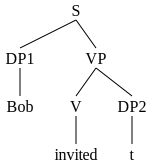

Interpreting S with parameters: [("'B'", 'e')]
   Interpreting VP with parameters: [("'B'", 'e')]
      Interpreting DP2 with parameters: [("'B'", 'e')]
         Interpreting t with parameters: [("'B'", 'e')]
         => t = 'B'  type: 'e'	(TP)
      => DP2 = 'B'  type: 'e'	(NN)
      Interpreting V with parameters: [("'B'", 'e')]
         Interpreting invited with parameters: [("'B'", 'e')]
         => invited = lambda y: lambda x: INVITED(x, y)  type: ('e', ('e', 't'))	(TN)
      => V = lambda y: lambda x: INVITED(x, y)  type: ('e', ('e', 't'))	(NN)
   => VP = lambda x: INVITED(x, 'B')  type: ('e', 't')	(FA)
   Interpreting DP1 with parameters: [("'B'", 'e')]
      Interpreting Bob with parameters: [("'B'", 'e')]
      => Bob = 'B'  type: 'e'	(TN)
   => DP1 = 'B'  type: 'e'	(NN)
=> S = 1  type: 't'	(AF)


1

visiting J Name(id='J', ctx=Load()) None
visiting 'J' Constant(value='J') None
Evaluated 'J' to 'J' (<class 'str'>)
DUMP Constant(value='J')
Evaluated J to 'J' (<class 'phosphorus.semval.Constant'>)
DUMP Name(id='J', ctx=Load())
Cleared Memo buffer: {}
Interpreting S with parameters: [("'J'", 'e')]
   Interpreting VP with parameters: [("'J'", 'e')]
      Interpreting DP2 with parameters: [("'J'", 'e')]
         Interpreting t with parameters: [("'J'", 'e')]
visiting a Name(id='a', ctx=Load()) None
visiting 'J' Constant(value='J') None
Evaluated 'J' to 'J' (<class 'str'>)
DUMP Constant(value='J')
Evaluated a to 'J' (<class 'phosphorus.semval.Constant'>)
DUMP Name(id='a', ctx=Load())
         => t = 'J'  type: 'e'	(TP)
Memoizing value for (t, ("Constant(value='J')",)): 'J'
visiting m.i(beta, a) Call(func=Attribute(value=Name(id='m', ctx=Load()), attr='i', ctx=Load()), args=[Name(id='beta', ctx=Load()), Name(id='a', ctx=Load())], keywords=[]) None
Using memoized value for (t, ("Constant(v

1

Interpreting S with parameters: [("'M'", 'e')]
   Interpreting VP with parameters: [("'M'", 'e')]
      Interpreting DP2 with parameters: [("'M'", 'e')]
         Interpreting t with parameters: [("'M'", 'e')]
         => t = 'M'  type: 'e'	(TP)
      => DP2 = 'M'  type: 'e'	(NN)
      Interpreting V with parameters: [("'M'", 'e')]
         Interpreting invited with parameters: [("'M'", 'e')]
         => invited = lambda y: lambda x: INVITED(x, y)  type: ('e', ('e', 't'))	(TN)
      => V = lambda y: lambda x: INVITED(x, y)  type: ('e', ('e', 't'))	(NN)
   => VP = lambda x: INVITED(x, 'M')  type: ('e', 't')	(FA)
   Interpreting DP1 with parameters: [("'M'", 'e')]
      Interpreting Bob with parameters: [("'M'", 'e')]
      => Bob = 'B'  type: 'e'	(TN)
   => DP1 = 'B'  type: 'e'	(NN)
=> S = 1  type: 't'	(AF)


1

Interpreting S with parameters: [("'S'", 'e')]
   Interpreting VP with parameters: [("'S'", 'e')]
      Interpreting DP2 with parameters: [("'S'", 'e')]
         Interpreting t with parameters: [("'S'", 'e')]
         => t = 'S'  type: 'e'	(TP)
      => DP2 = 'S'  type: 'e'	(NN)
      Interpreting V with parameters: [("'S'", 'e')]
         Interpreting invited with parameters: [("'S'", 'e')]
         => invited = lambda y: lambda x: INVITED(x, y)  type: ('e', ('e', 't'))	(TN)
      => V = lambda y: lambda x: INVITED(x, y)  type: ('e', ('e', 't'))	(NN)
   => VP = lambda x: INVITED(x, 'S')  type: ('e', 't')	(FA)
   Interpreting DP1 with parameters: [("'S'", 'e')]
      Interpreting Bob with parameters: [("'S'", 'e')]
      => Bob = 'B'  type: 'e'	(TN)
   => DP1 = 'B'  type: 'e'	(NN)
=> S = 0  type: 't'	(AF)


0

In [ ]:
class Meaning1(Meaning):
  def rules(self, alpha, a):
    value, rule = None, None
    m = self
    match alpha:
      # TP
      case 't':
        rule = 'TP'
        value = 'a'.e

      # TN
      case str() as s:
        rule = 'TN'
        value = self.lookup(s)
        if value is None:
          value = VACUOUS
      
      # PA
      case ('who', beta):
        rule = 'PA'
        value = (lambda x : m.i(beta, x)).et

      # NN
      case (beta,) if m.i(beta,a) is VACUOUS:
        rule = 'NN'
        value = VACUOUS
        logger.warning('Ignoring vacuous item %s', beta)

      case (beta,):
        rule = 'NN'
        value = PV(m.i(beta,a))

      case (beta, gamma) if  m.i(gamma,a) is VACUOUS:
        rule = 'NN'
        value = PV(m.i(beta,a))
        logger.warning('Ignoring vacuous item %s', gamma)

      case (gamma, beta) if m.i(gamma,a) is VACUOUS:
        rule = 'NN'
        value = PV(m.i(beta,a))
        logger.warning('Ignoring vacuous item %s', gamma)

      # PM
      case (beta, gamma) if m.i(gamma,a) in Type.et and m.i(beta,a) in Type.et:
        rule = 'PM'
        value = (lambda x: m.i(beta,a)(x) and m.i(gamma,a)(x)
                    if m.i(beta,a)(x) is not None 
                    and m.i(gamma,a)(x) is not None
                    else None).et

      # FA
      case (beta, gamma) if takes(m.i(beta,a), m.i(gamma,a)):
        rule = 'FA'
        value = PV(m.i(beta,a)(m.i(gamma,a)))
      case (gamma, beta) if takes(m.i(beta,a), m.i(gamma,a)):
        rule = 'AF'
        value = PV(m.i(beta,a)(m.i(gamma,a)))

    return value, rule


S, B, M, J = (PV.e(c) for c in 'SBMJ')
INVITED = Predicate({
    (S,B), (S,M), (B,B), (B,J), (B, M)
})

m = Meaning1({
    'Bob'       : 'B'.e,
    'invited'   : (lambda y: lambda x: INVITED(x,y)).eet, 
})

from nltk.tree import Tree
from IPython.display import HTML
tree1 = Tree.fromstring(
'''
(S (DP1 Bob)
  (VP (V invited) 
    (DP2 t)
  )
)
''')

tree1

Predicate.__repr__ = '<Predicate>'

HTML('<h3>Assignment B</h3>')
m.i(tree1, 'B'.e)

HTML('<h3>Assignment J</h3>')
console_handler.setLevel(logging.DEBUG)
m.i(tree1, 'J'.e)
console_handler.setLevel(logging.INFO)

HTML('<h3>Assignment M</h3>')
m.i(tree1, 'M'.e)

HTML('<h3>Assignment S</h3>')
m.i(tree1, 'S'.e)

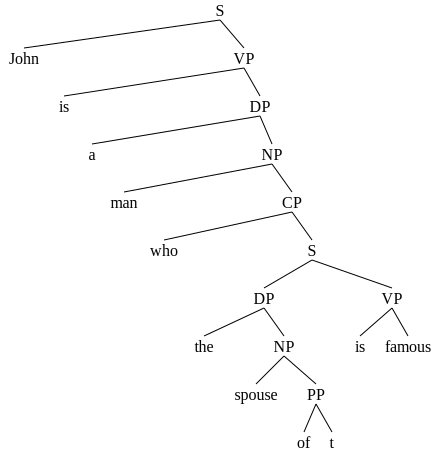

Interpreting S with parameters: [None]
   Interpreting VP with parameters: [None]
      Interpreting DP with parameters: [None]
         Interpreting NP with parameters: [None]
            Interpreting CP with parameters: [None]
               Interpreting S with parameters: [('x', None)]
                  Interpreting VP with parameters: [('x', None)]
                     Interpreting famous with parameters: [('x', None)]
                     => famous = lambda x: FAMOUS(x)  type: ('e', 't')	(TN)
                     Interpreting is with parameters: [('x', None)]
                     => is = VACUOUS  type: None	(TN)
Ignoring vacuous item is
                  => VP = lambda x: FAMOUS(x)  type: ('e', 't')	(NN)
                  Interpreting DP with parameters: [('x', None)]
                     Interpreting NP with parameters: [('x', None)]
                        Interpreting PP with parameters: [('x', None)]
                           Interpreting t with parameters: [('x', None)]
    

1 and FAMOUS(iota(lambda z: SPOUSE(z, 'J')) if single(charset(lambda z: SPOUSE(z, 'J'))) else None) if True and FAMOUS(iota(lambda z: SPOUSE(z, 'J')) if single(charset(lambda z: SPOUSE(z, 'J'))) else None) is not None else None

In [ ]:
#SPOUSE  = Predicate({})
MAN       = Predicate({(J,)})
#SPOUSE  = Predicate({(B,J), (J,B)})
SPOUSE  = Predicate({(B,S), (S,B)})
FAMOUS  = Predicate({(B,),(S,)}) 

from nltk import ImmutableTree

m.update({
    'John'      : 'J'.e,
    'man'       : (lambda x: MAN(x)).et,
    'attended'  : (lambda y: lambda x: ATTENDED(x,y)).eet,
    'the'       : (lambda f: iota(f) if single(charset(f)) else None).et_e,
    '2019_Olympics' : (lambda x: OLYMPICS2019(x)).et,
    'famous'  : (lambda x: FAMOUS(x)).et,
    'spouse'  : (lambda y: lambda x: SPOUSE(x,y)).eet,
})

tree2iv = Tree.fromstring(
'''
(S John
  (VP is
    (DP a
      (NP man
        (CP who
          (S 
            (DP the
              (NP spouse (PP of t))
            )
            (VP is famous)
          )
        )
      )
    )
  )
)''')

tree2iv
#console_handler.setLevel(logging.DEBUG)
m.i(tree2iv, None)
#console_handler.setLevel(logging.INFO)

In [ ]:
single(charset(lambda z: SPOUSE(z, 'J')))

False

In [ ]:
1 if True and FAMOUS('B' if single(charset(lambda z: SPOUSE(z, 'J'))) else None) is not None else None

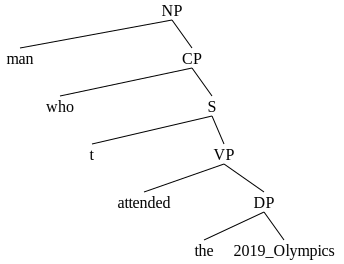

Interpreting (NP man (CP who (S t (VP attended (DP the 2019_Olympics))))) with parameters: [("'M'", 'e')]
   Interpreting (CP who (S t (VP attended (DP the 2019_Olympics)))) with parameters: [("'M'", 'e')]
      Interpreting (S t (VP attended (DP the 2019_Olympics))) with parameters: [('x', None)]
         Interpreting (VP attended (DP the 2019_Olympics)) with parameters: [('x', None)]
            Interpreting (DP the 2019_Olympics) with parameters: [('x', None)]
               Interpreting 2019_Olympics with parameters: [('x', None)]
               => 2019_Olympics = lambda x: O2019(x)  type: ('e', 't')	(TN)
               Interpreting the with parameters: [('x', None)]
               => the = lambda f: iota(f) if single(charset(f)) else None  type: (('e', 't'), 'e')	(TN)
            => (DP the 2019_Olympics) = iota(lambda x: O2019(x)) if single(charset(lambda x: O2019(x))) else None  type: 'e'	(FA)
            Interpreting attended with parameters: [('x', None)]
            => attend

lambda x: False if MAN(x) is not None and None is not None else None

In [ ]:

m = Meaning1({
    'Bob'       : 'B'.e,
    'invited'   : (lambda y: lambda x: INVITED(x,y)).eet,
    'John'      : 'J'.e,
    'man'       : (lambda x: MAN(x)).et,
    'attended'  : (lambda y: lambda x: ATTENDED(x,y)).eet,
    'the'       : (lambda f: iota(f) if single(charset(f)) else None).et_e,
    '2019_Olympics' : (lambda x: O2019(x)).et,
})


from nltk import Tree, ImmutableTree

tree1 = Tree.fromstring('(S Bob (VP is man))')

tree2 = Tree.fromstring('''
(S John
  (VP attended
    (DP the 2019_Olympics)
  )
)''')

tree3 = Tree.fromstring('''
(CP who
  (S t
    (VP attended
      (DP the 2019_Olympics)
    )
  )
)''')

tree4 = Tree('NP', ('man', tree3))
tree4

O2019 = lambda x: 0

#console_handler.setLevel(logging.DEBUG)
m.i(tree4, 'M'.e)
#console_handler.setLevel(logging.INFO)

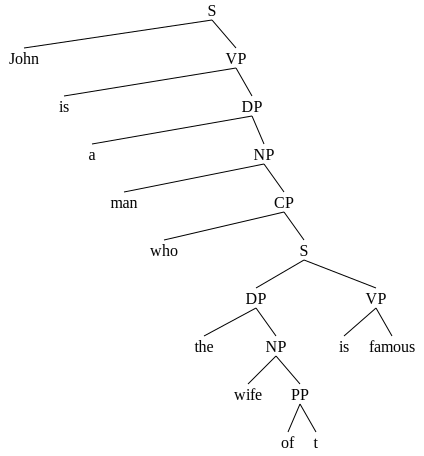

Interpreting (S
  John
  (VP
    is
    (DP
      a
      (NP
        man
        (CP who (S (DP the (NP wife (PP of t))) (VP is famous))))))) with parameters: [("'M'", 'e')]
   Interpreting (VP
  is
  (DP
    a
    (NP man (CP who (S (DP the (NP wife (PP of t))) (VP is famous)))))) with parameters: [("'M'", 'e')]
      Interpreting (DP
  a
  (NP man (CP who (S (DP the (NP wife (PP of t))) (VP is famous))))) with parameters: [("'M'", 'e')]
         Interpreting (NP man (CP who (S (DP the (NP wife (PP of t))) (VP is famous)))) with parameters: [("'M'", 'e')]
            Interpreting (CP who (S (DP the (NP wife (PP of t))) (VP is famous))) with parameters: [("'M'", 'e')]
               Interpreting (S (DP the (NP wife (PP of t))) (VP is famous)) with parameters: [('x', None)]
                  Interpreting (VP is famous) with parameters: [('x', None)]
                     Interpreting famous with parameters: [('x', None)]
                     => famous = lambda x: FAMOUS(x)  type: ('e', 

In [ ]:
m.update({
    'wife'    : (lambda y: lambda x: WIFE(x,y)).eet,
    'famous'  : (lambda x: FAMOUS(x)).et,
})
tree5 = Tree.fromstring(
'''
(S John
  (VP is
    (DP a
      (NP man
        (CP who
          (S 
            (DP the
              (NP wife (PP of t))
            )
            (VP is famous)
          )
        )
      )
    )
  )
)''')

tree5

WIFE = lambda x,y: x != 'J'.e

out = m.i(tree5, 'M'.e)
out

In [ ]:
PV.e(iota(lambda x: O2019(x)) if single(charset(lambda x: O2019(x))) else None).eval() is None
takes(m['attended'], PV.e(iota(lambda x: O2019(x)) if single(charset(lambda x: O2019(x))) else None))

True

Interpreting attended with parameters: [()]
=> attended = lambda y: lambda x: ATTENDED(x, y)  type: ('e', ('e', 't'))	(TN)


False

In [ ]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
def takes(f,x):
  f_type = getattr(f, 'type', [])
  x_type = getattr(x, 'type', None)
  #print('TAKES', f, f_type, x, x_type)
  if len(f_type) == 2:
    return f_type[0] == x_type
  return False

def is_et(f):
  return getattr(f, 'type', None) == Type.et

class MeaningPV(Meaning):
  def rules(self, alpha, g):
    value, rule = None, None
    m = self
    match alpha:
      # TP
      case str() if '_' in alpha and alpha.split('_')[1].isdecimal():
        i = int(alpha.split('_')[1])
        rule = 'TP'
        value = 'g[i]'.e

      # case int() | str() as i if str(i).isdecimal():
      #   i = int(i)
      #   rule = 'IX'
      #   value = i

      case str() as s:
        rule = 'TN'
        value = self.lookup(s)
      
      # PA
      case (i, beta) if str(i).isdecimal():
        i = int(i)
        rule = 'PA'
        value = (lambda x : m.i(beta, g | {i:x})).et

      # NN
      case (beta,) if m.i(beta,g) is None:
        rule = 'NN'
        value = None
        logger.warning('Ignoring vacuous item %s', beta)

      case (beta,):
        rule = 'NN'
        value = PV(m.i(beta,g))

      case (beta, gamma) if  m.i(gamma,g) is None:
        rule = 'NN'
        value = PV(m.i(beta,g))
        logger.warning('Ignoring vacuous item %s', gamma)

      case (gamma, beta) if m.i(gamma,g) is None:
        rule = 'NN'
        value = PV(m.i(beta,g))
        logger.warning('Ignoring vacuous item %s', gamma)

      # PM
      case (beta, gamma) if is_et(m.i(gamma,g)) and is_et(m.i(beta,g)):
        rule = 'PM'
        value = (lambda x: m.i(beta,g)(x) and m.i(gamma,g)(x)).et

      # FA
      case (beta, gamma) if takes(m.i(beta,g), m.i(gamma,g)):
        rule = 'FA'
        value = PV(m.i(beta,g)(m.i(gamma,g)))
      case (gamma, beta) if takes(m.i(beta,g), m.i(gamma,g)):
        rule = 'AF'
        value = PV(m.i(beta,g)(m.i(gamma,g)))

    return value, rule

m = MeaningPV({
  'snores' : 'lambda x: SNORES(x)'.et,
  'Allie' : 'A'.e,
  'Bob' : 'B'.e,
  'saw' : (lambda y: lambda x: SAW(x,y)).eet
})

m.i(((0, 'he_0'), 'Allie'), {})
#m.i((0, 'he_0'), {})


Interpreting ((0, 'he_0'), 'Allie') with parameters: [{}]
   Interpreting Allie with parameters: [{}]
   => Allie = A 	(TN)
   Interpreting (0, 'he_0') with parameters: [{}]
      Interpreting he_0 with parameters: ['{0: x}']
      => he_0 = x 	(TP)
   => (0, 'he_0') = lambda x: x 	(PA)
=> ((0, 'he_0'), 'Allie') = A 	(FA)


A

In [ ]:
#console_handler.setLevel(logging.DEBUG)
m.i((0, ('Bob', (('is',), ('saw', 't_0')))), {})
#console_handler.setLevel(logging.INFO)

Interpreting (0, ('Bob', (('is',), ('saw', 't_0')))) with parameters: [{}]
   Interpreting ('Bob', (('is',), ('saw', 't_0'))) with parameters: ['{0: x}']
      Interpreting (('is',), ('saw', 't_0')) with parameters: ['{0: x}']
         Interpreting ('saw', 't_0') with parameters: ['{0: x}']
            Interpreting t_0 with parameters: ['{0: x}']
            => t_0 = x 	(TP)
            Interpreting saw with parameters: ['{0: x}']
            => saw = lambda y: lambda x: SAW(x, y) 	(TN)
         => ('saw', 't_0') = lambda z: SAW(z, x) 	(FA)
         Interpreting ('is',) with parameters: ['{0: x}']
            Interpreting is with parameters: ['{0: x}']
            => is = None 	(TN)
Removed vacuous item is
         => ('is',) = None 	(NN)
Removed vacuous item ('is',)
      => (('is',), ('saw', 't_0')) = lambda z: SAW(z, x) 	(NN)
      Interpreting Bob with parameters: ['{0: x}']
      => Bob = B 	(TN)
   => ('Bob', (('is',), ('saw', 't_0'))) = SAW(B, x) 	(AF)
=> (0, ('Bob', (('is',), (

lambda x: SAW(B, x)

In [ ]:
from nltk import Tree, ImmutableTree
tree = Tree.fromstring('(CP 0 (S Bob (VP saw t_0)))')
#console_handler.setLevel(logging.DEBUG)
m.i((0, ('Bob', ('saw', 't_0'))), {})
console_handler.setLevel(logging.INFO)

Interpreting (0, ('Bob', ('saw', 't_0'))) with parameters: [{}]
   Interpreting ('Bob', ('saw', 't_0')) with parameters: ['{0: x}']
      Interpreting ('saw', 't_0') with parameters: ['{0: x}']
         Interpreting t_0 with parameters: ['{0: x}']
         => t_0 = x 	(TP)
         Interpreting saw with parameters: ['{0: x}']
         => saw = lambda y: lambda x: SAW(x, y) 	(TN)
      => ('saw', 't_0') = lambda z: SAW(z, x) 	(FA)
      Interpreting Bob with parameters: ['{0: x}']
      => Bob = B 	(TN)
   => ('Bob', ('saw', 't_0')) = SAW(B, x) 	(AF)
=> (0, ('Bob', ('saw', 't_0'))) = lambda x: SAW(B, x) 	(PA)


PA SAW(B, x)


lambda x: SAW(B, x)

In [ ]:
SNORES = Predicate({('A',), (PV.e('B'),)})
C = PV.e('C')
B = PV.e('B')
B
B == PV.e('B')
console_handler.setLevel(logging.DEBUG)
"(lambda x: (lambda y : SNORES(y))(x))(B)".et
console_handler.setLevel(logging.INFO)

In [ ]:
class MeaningPV(Meaning):
  def rules(self, alpha, g={}):
    value, rule = None, None
    m = self(g)
    match alpha:
      # PA
      case (int() as i, beta):
        rule = 'PA'
        m = self
        value = (lambda x : m.i(beta, g | {i:x})).ee        

      # TP
      case str() if '_' in alpha and alpha.split('_')[1].isdigit():
        i = int(alpha.split('_')[1])
        rule = 'TP'
        value = 'g[i]'.e

      case int() as i:
        rule = 'TN'
        value = i

      case str() as s:
        rule = 'PN'
        value = self.lookup(s)

    return value, rule

m = MeaningPV({
  'snores' : 'lambda x: SNORES(x)'.et,
#  'Allie' : 'A'.e
})

#console_handler.setLevel(logging.DEBUG)
PV(m.i((0, 'he_0'), {}))
console_handler.setLevel(logging.INFO)

In [ ]:
modify = (lambda g,i,a: g | {i:a}).xg
modify
gg = {1:2,3:4}
console_handler.setLevel(logging.DEBUG)
ff = (lambda x : (gg | {1:x})[1]).eg
ff
ff(3)
console_handler.setLevel(logging.INFO)

In [ ]:
class Meaning5b(Meaning):
  def rules(self, alpha):
    value, rule = None, None
    match alpha:
      # PA
      case (int() as i, beta):
        rule = 'PA'
        m = self
        value = (lambda x : (lambda g : g[i])(g | {i:x})).ee
        value = value(m[beta])
        

      # TP
      case str() if '_' in alpha and alpha.split('_')[1].isdigit():
        i = int(alpha.split('_')[1])
        rule = 'TP'
        value = 'g[0]'.e

      case int() as i:
        rule = 'TN'
        value = i

    return value, rule

m = Meaning5b({
  'snores' : 'lambda x: SNORES(x)'.et,
  'Allie' : 'A'.e
})

ff = m[0, 'he_0']
ff
(lambda g : ff).ge({1:'Z'.e, 2:'B'.e})
#ff({1:'Z'.e, 2:'B'.e})('A'.e)

In [ ]:
class Meaning5b(Meaning):
  def rules(self, alpha):
    value, rule = None, None
    match alpha:
      # PA
      case (int() as i, beta):
        rule = 'PA'
        m = self
        value = (lambda y : lambda g: lambda x : y(g|{0:x})).ge_gee
        logger.warning('value context: %s', value.context)
        value = value(m[beta])
        logger.warning('value context: %s', value.context)
        

      # TP
      case str() if '_' in alpha and alpha.split('_')[1].isdigit():
        i = int(alpha.split('_')[1])
        rule = 'TP'
        value = (lambda g : g[0]).ge

      case int() as i:
        rule = 'TN'
        value = i

    return value, rule

m = Meaning5b({
  'snores' : 'lambda x: SNORES(x)'.et,
  'Allie' : 'A'.e
})

ff = m[0, 'he_0']
ff
ff({1:'Z'.e, 2:'B'.e})
ff({1:'Z'.e, 2:'B'.e})('A'.e)

In [ ]:
def modify(g, i, a):
  g[i] = SemVal(str(a), Type.e)
  return g

class Meaning5b(Meaning):
  def rules(self, alpha, g): # pylint: disable=no-self-argument
    """Defines standard rules for combining the meanings of the
    children of a node alpha. Meant to be overridden if different rules are wanted."""

    value, rule = None, None
    m = self(g)
    match alpha:
      # PA
      case (int() as i, beta):
        rule = 'PA'
        m = self
        value = (lambda x : m(modify(g,i,x))[beta]).et

      # PM
      case (beta, gamma) if m[gamma].type == m[beta].type == Type.et:
        rule = 'PM'
        pm_f = Function('lambda f : lambda g: lambda x: f(x) and g(x)', Type.et_et_et)
        value = pm_f(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if  m[gamma] in m[beta].domain() :
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if  m[gamma] in m[beta].domain() :
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]
      
      # TP
      case str() if '_' in alpha and alpha.split('_')[1].isdigit():
        i = int(alpha.split('_')[1])
        rule = 'TP'
        value = g[i]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case int() as i:
        rule = 'TN'
        value = i

    return value, rule

m = Meaning5b({
  'snores' : 'lambda x: SNORES(x)'.et,
  'Allie' : 'A'.e
})

ff = m(['Z'.e, 'B'.e])[(0, ('he_0', 'snores'))]
ff

In [ ]:
class Meaning5a(Meaning):
  def rules(self, alpha, a): # pylint: disable=no-self-argument
    """Defines standard rules for combining the meanings of the
    children of a node alpha. Meant to be overridden if different rules are wanted."""

    value, rule = None, None
    m = self(a)
    match alpha:      
      # PM
      case (beta, gamma) if m[gamma].type == m[beta].type == Type.et:
        rule = 'PM'
        pm_f = Function('lambda f : lambda g: lambda x: f(x) and g(x)', Type.et_et_et)
        value = pm_f(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if  m[gamma] in m[beta].domain() :
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if  m[gamma] in m[beta].domain() :
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      case 't'|'he'|'she'|'it':
        rule = 'TP'
        value = a
      
      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

    return value, rule

m = Meaning5a({
  'snores' : 'lambda x: SNORES(x)'.et,
})

m('A'.e)['he', 'snores']

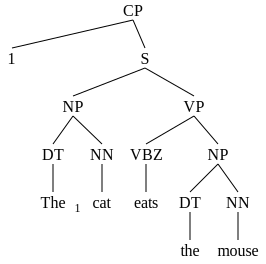

str

In [ ]:
import svgling
from nltk import Tree

tree = Tree.fromstring('(CP 1 (S (NP (DT The_1) (NN cat)) (VP (VBZ eats) (NP (DT the) (NN mouse)))))')

def split_leaf(node):
  if isinstance(node, str):
    l = node.split('_')
    if len(l) > 1:
      return svgling.core.subscript_node(l[0], l[1]), ()
    return node, ()

def _repr_svg_(self):
  return svgling.draw_tree(self, tree_split=split_leaf)._repr_svg_()

Tree._repr_svg_ = _repr_svg_
tree
type(tree[0][0][0])


In [ ]:
from string import ascii_uppercase
DOMAIN = [SemVal.create(c,Type.e) for c in ascii_uppercase]
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z = DOMAIN

def charset(f, domain = None):
  #logger.warning(f'CHARSET of {repr(f)}')
  if domain is None:
    domain = DOMAIN
  out = {c for c in domain if f(c)}
  #logger.warning(f'CHARSET of {f} is {out}')
  return out

def iota(f, domain = None):
  #logger.warning(f'IOTA of {f}')
  return max(charset(f,domain))

In [ ]:
from IPython.display import HTML
from nltk import Tree
# Domain and Predicates / Relations
A, B, C, D, E, F, G = DOMAIN[:7]
PAWN = Predicate({
    (A,), (B,), (C,), (D,), (E,), (F,), (G,)
})
LEFT_OF = Predicate({
    (A,B), (A,C), (A,D), (A,E), (A,F), (A,G),
    (B,C), (B,D), (B,E), (B,F), (B,G),
    (C,D), (C,E), (C,F), (C,G),
    (D,E), (D,F), (D,G),
    (E,F), (E,G),
    (F,G)            
})
BLACK = Predicate({
    (B,), (D,), (E,), (F,)
})


# Lexical entries
m3 = Meaning({
    'leftmost.et'  : 'lambda x : len(charset(lambda y : LEFT_OF(y,x)))==0'.et,
    'pawn'      : 'lambda x : PAWN(x)'.et,
    'the'       : 'lambda f : (len(charset(f))==1, iota(f))'.et_e,
    'black'     : 'lambda x : BLACK(x)'.et
})
    

# CHANGE ONLY BELOW
m3.update({
    'leftmost.et_et' : 'lambda f : lambda x: len(charset(lambda y : f(y) and LEFT_OF(y,x)))==0'.et_et
})
# CHANGE ONLY ABOVE

HTML("<h3>[black pawn]</h3>")
charset(m3['black','pawn'])

HTML("<h3>[leftmost.et pawn]</h3>")
charset(m3['leftmost.et','pawn'])

tree3 = Tree.fromstring('(NP leftmost.et (NP black pawn))')
HTML('<h3>[leftmost.et black pawn]</h3>')
tree3
charset(m3[tree3])

HTML("<h3>[leftmost.et_et pawn]</h3>")
charset(m3['leftmost.et_et','pawn'])

tree3 = Tree.fromstring('(NP leftmost.et_et (NP black pawn))')
HTML('<h3>[leftmost.et_et black pawn]</h3>')
tree3
charset(m3[tree3])

In [ ]:
from nltk import ImmutableTree
tt = ImmutableTree.fromstring('(NP leftmost.et_et (NP black pawn))')
type([tt]) == list


In [ ]:
console_handler.setLevel(logging.INFO)
the = 'lambda f: iota(f) if len(charset(f)) == 1 else None'.et_e
dog = 'lambda x: x in DOMAIN[:1]'.et
charset(dog)
the(dog)

In [ ]:
#DOMAIN = DOMAIN[:3]
#DOMAIN
KILLED = Predicate({(A,B),})
BLACK = Predicate({(B,), (C,)})
CAT = Predicate({(B,)})
ESCAPED = Predicate({(A,)})

del KILLED
del BLACK
del CAT
del ESCAPED

In [ ]:
m= Meaning()
m.update({
  'killer'  : 'lambda y: lambda x :KILLED(x,y)'.eet,
  'black'   : 'lambda x: BLACK(x)'.et,
  'cat'     : 'lambda x: CAT(x)'.et,
  'escaped' : 'lambda x: ESCAPED(x)'.et,
  'the'     : 'lambda f: ( len(charset(f))==1, iota(f) )'.et_e
})

from nltk import Tree
tree = Tree.fromstring("""
(S  (DP the
        (NP killer
            (PP of
                (DP the
                    (NP black cat)
                )
            )
        )
    )
    (VP escaped)
)
""")

test = tree[0][1][1][1]
test = tree
test

m[test]




In [ ]:
m.memo

In [ ]:
from nltk import Tree
tree = Tree.fromstring("""
(S
  (NP Julius)
  (VP is
      (VP sleeping
          (PP on (NP the couch))
      )
  )
)""")
tree

m = Meaning({
    'Julius'    : 'J'.e,
    'the'       : 'lambda f: iota(f)'.et_e,

})

#m[tree]

In [ ]:
#!pip install nltk
from nltk import Tree
#!pip install svgling

In [ ]:
node = parse('PAWN("A")', mode='eval')
obj = compile(node, '<string>', 'eval')
eval(obj)

In [ ]:
m = Meaning({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f : lambda x: f(x) and GRAY(x)'.et_et,
})

m['Joe', 'cat']

In [ ]:
t = Tree.fromstring('(S (NP Joe) (VP cat (VP (V is) (NP cat gray))))')
t

m[t]

In [ ]:
m.update({
  'gray'    : 'lambda f : lambda x: f(x) and GRAY(x)'.eet_t,
  })

m['gray']
m[t]

In [ ]:
class Meaning4(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # PM
      case (beta, gamma) if m.quiet(  m[gamma].type == m[beta].type == Type.et ):
        rule = 'PM'
        value = 'lambda f : lambda g: lambda x: f(x) and g(x)'.et_et_et(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m4 = Meaning4({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'Texas'   : 'T'.e,
    'in'      : 'lambda x: lambda y: IN(y,x)'.eet,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda x: GRAY(x)'.et,
})

m4['gray', 'cat']
m4['Kaline', [['gray', 'cat'], ['in', 'Texas']]]

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m3 = Meaning3({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f: lambda x: f(x) and GRAY(x)'.et_et,
    'fond'    : ...
})

#m3['Joe']
#m3['Kaline']
#m3['cat']
#m3['Kaline', 'cat']
m3[('a',)]
m3['a', 'cat']
m3['is', ['a', 'cat']]
m3['Kaline', [['fond', 'Joe'], ['gray', 'cat']]]
m3['Kaline', 'gray']

In [ ]:
m3.update({'is': 'lambda f: lambda x: f(lambda y:1)(x)'.et_et__et})

m3['gray']
m3['is', 'gray']

In [ ]:
tree = Tree.fromstring('(S (NP (N Kaline)) (VP is (NP (Det a) (N cat))))')
tree
m3[tree]

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():# if alpha in m:
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha
    return value, rule

m = Meaning3({
    'Ann'     : 'A'.e,
    'smokes'  : 'lambda x: SMOKES(x)'.et,
    'tall'    : 'lambda x: TALL(x)'.et,
    'likes'   : 'lambda x: lambda y: LIKES(x,y)'.eet,
#    'is'      : None,
})

m['Ann']
m['smokes']
m['Ann', 'smokes']
m['smokes', 'Ann']

In [ ]:
m['tall', 'is']

In [ ]:
t = [1,2]
t = t - [1]

In [ ]:
'lambda f:lambda x: f(x) and GRAY(x)'.et

In [ ]:
'(lambda x: lambda y: lambda z: INTRODUCED(z,x,y))(S)'.eet

a. [λx.[λy.[λz.z introduced x to y]]](Ann)(Sue)

b. [λx.[λy.[λz.z introduced x to y](Ann)](Sue)]

c. [λx.[λy.[λz.z introduced x to y](Ann)]](Sue) 

d. [λx.[λy.[λz.z introduced x to y]](Ann)](Sue)

e. [λf.[λx.f(x)=1 and x is gray]]([λy.y is a cat])

f. [λg.[λx.g(x)(Ann)=1]]([λy.[λz.z saw y]])

g. [λm.[λn.n>3 and n<7](m)] 

h. [λm.[λn.[λo.o>3 and o<7](n)](m)] 

In [ ]:
'lambda g: (lambda x:g(x)(Ann))'.eet_et('lambda y:lambda z:SAW(z,y)'.eet)

'lambda m: lambda n:n>3 and m<7'.eet('3'.e)

In [ ]:
catf = 'lambda y:CAT(y)'.et

ff = 'lambda f: lambda x: f(x) and GRAY(x)'.et_et
ff(catf)

gg = 'lambda f: f(A)'.eet_et
gg
gg('lambda x:lambda y:FOO(x,y)'.eet)

In [ ]:
Function('lambda y: CAT(y)', Type(('e', 't')))('x') and GRAY('x')

In [ ]:
import ast
ast.dump(ast.parse('x smokes', mode= 'eval'))